In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# from umap import UMAP

In [7]:
df = pd.read_csv("APPRAISE_NETFLOW.csv").dropna()

def change_fourth_octet(ip_source):
    parts = ip_source.split('.')
    parts[3] = '0'
    return '.'.join(parts)

df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(change_fourth_octet)

In [8]:
def ip_to_float(ip):
    a, b, c, d = map(int, ip.split('.'))
    return (a << 24) + (b << 16) + (c << 8) + d

df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(ip_to_float)
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(ip_to_float)

In [9]:
df['FLOW_DURATION'] = df['LAST_SWITCHED'] - df['FIRST_SWITCHED']
new_df = df[['FLOW_ID', 'IPV4_SRC_ADDR','IPV4_DST_ADDR', 'FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'PROTOCOL','L7_PROTO','TCP_FLAGS', 'L4_DST_PORT', 'L4_SRC_PORT']] 

In [14]:
sample_df = new_df.sample(n=10000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

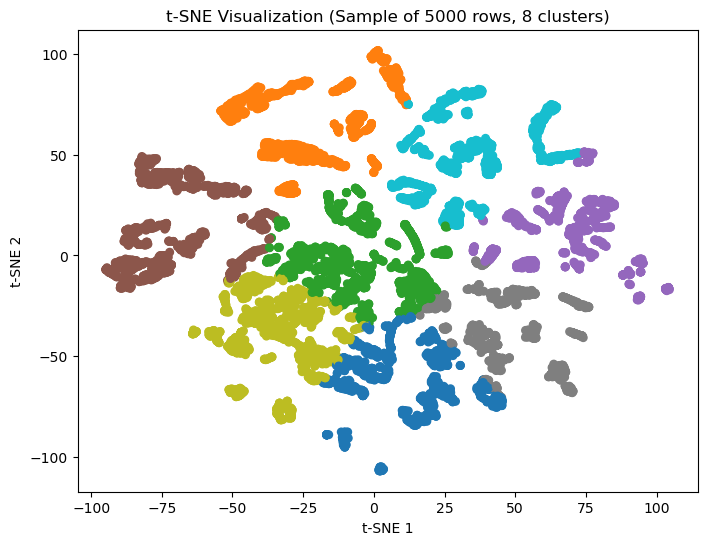

In [15]:
sample_df = sample_df.copy()

sample_df['TSNE1'] = X_tsne[:, 0]
sample_df['TSNE2'] = X_tsne[:, 1]

sample_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(sample_df['TSNE1'], sample_df['TSNE2'], c=sample_df['Cluster'], cmap='tab10', s=30)
plt.title('t-SNE Visualization (Sample of 5000 rows, 8 clusters)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
# low score indicates overlapping clusters
print(silhouette_score(X_scaled, clusters))

0.06228074445651938


In [12]:
new_df = df[[
 'IN_BYTES', 'OUT_BYTES',
    'IN_PKTS', 'OUT_PKTS',
    'L4_DST_PORT',
    'TCP_FLAGS',
    'PROTOCOL',
    'TOTAL_FLOWS_EXP',
    'L7_PROTO'
]]

# new_df.head(50)
new_df.nunique()

IN_BYTES             75925
OUT_BYTES            95972
IN_PKTS               6538
OUT_PKTS              6123
L4_DST_PORT          14855
TCP_FLAGS               27
PROTOCOL                 6
TOTAL_FLOWS_EXP    3055254
L7_PROTO               151
dtype: int64

In [15]:
sample_df = new_df.sample(n=15000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

pca = PCA(n_components=9, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=100,
    init='pca',
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

# umap_model = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=None)
# X_umap = umap_model.fit_transform(X_pca)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

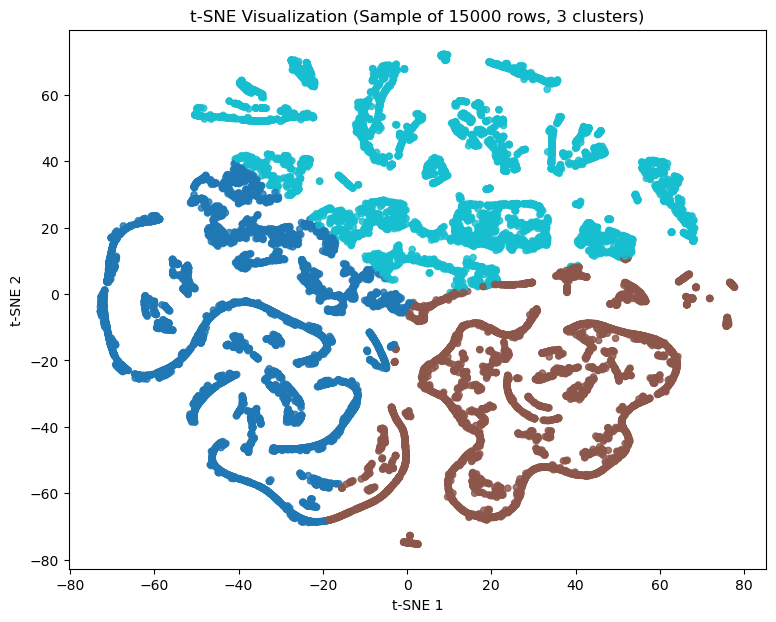

In [16]:
sample_df = sample_df.copy()

sample_df['TSNE1'] = X_tsne[:, 0]
sample_df['TSNE2'] = X_tsne[:, 1]

sample_df['Cluster'] = clusters

plt.figure(figsize=(9,7))
plt.scatter(sample_df['TSNE1'], sample_df['TSNE2'], c=sample_df['Cluster'], cmap='tab10', s=20, alpha=0.8)
plt.title('t-SNE Visualization (Sample of 15000 rows, 3 clusters)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
